In this notebook, we take check how transmission looks like if we use two same patterns in one cell.

This should give the same transmission results as using just one copy of the pattern. More bands will show up if we perturb the pattern.

In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

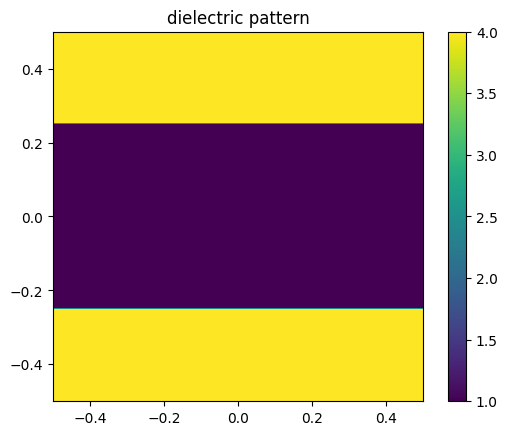

In [2]:
### some params
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*4 ### uniform dielectric slab
radius = 0.25
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[ys**2 < radius**2] = 1 ### air holes in dielectric slab
plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); 
plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### frequencies to scan through:
freqs = np.linspace(0.51,0.99,101)
thetas = np.linspace(1e-4,89,101) * DEG
inds = range(1,6)

### verifying convention
i.e. we are using exp(-ikx) convention with phase decreasing during propagation

In [3]:
ind = 1
freq = 0.7
gaps = [0,0.01]

In [4]:
obj = rcwa([np.ones([100,100])], [0.01], [1], twist=0, N=0, M=ind, verbose=0)
obj.set_freq_k(0.7, (0, 0))
obj.get_RT(0,1)
print(obj.transmitted)

[[0.        +0.j        ]
 [0.99903293-0.04396812j]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]]


In [5]:
for gap in gaps:
    obj = rcwa([eps,None,eps], [thickness,gap,thickness], [1,1,2], gap_layer_indices=[1], twist=0.1, N=0, M=ind, verbose=0)
    obj.set_freq_k(freq, (0, 0))
    (r,t), (reflected,transmitted) = obj.get_RT(0,1)
    print(np.angle(transmitted[0]))

2.568783938417757
2.535200327700019


In [6]:
obj = rcwa([eps], [thickness], [1], N=0, M=ind, verbose=0)
obj.set_freq_k(1.4, (0, 0))
(r,t), (reflected,transmitted) = obj.get_RT(0,1)
print(obj.transmitted)
print(np.diag(obj.kzt))

[[-0.3661937 +0.51539926j]
 [-0.58175142-0.25228045j]
 [-0.3694248 +0.51308824j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
[0.69985421+0.j 1.        +0.j 0.69985421+0.j]


### for gaussian incidence field

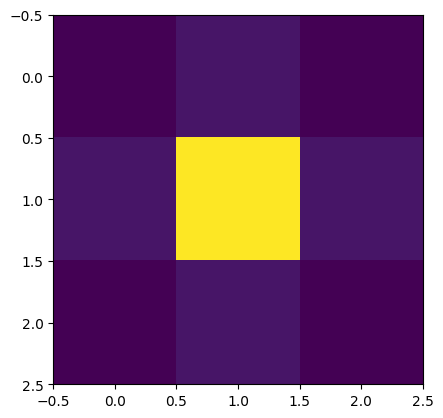

In [8]:
freq = 1.4
# ks = np.linspace(-0.2,0.2,3)
# ks = np.linspace(-0.3,0.3,21)
ks = np.linspace(-0.05,0.05,3)
kxs, kys = np.meshgrid(ks,ks)
kincs = np.vstack([kxs.flatten(),kys.flatten()]).T
# amps = np.exp((-kxs**2-kys**2)/0.12**2)
# amps = np.exp((-kxs**2-kys**2)/0.2**2)
amps = np.exp((-kxs**2-kys**2)/0.03**2)
plt.imshow(amps)

9it [00:00, 208.07it/s]


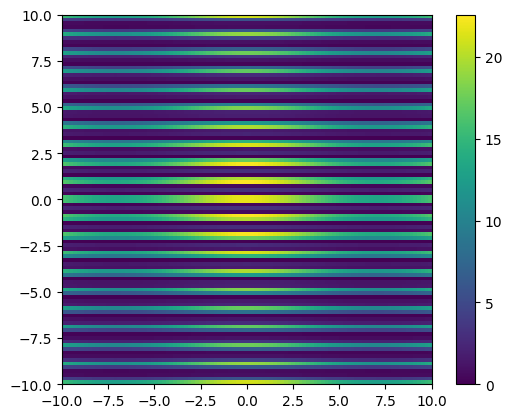

In [9]:
### trivial air propagation
obj = rcwa([np.ones([100,100])], [0], [1], twist=0, N=0, M=ind, verbose=0)
### beam is a sum of plane waves
beam = SummedRCWA(obj, freq, kincs, amps)
# beam = SummedRCWA(obj, freq, kincs, amps, 1,0,-60,60,-60,60)
beam.total_RT()
fields = beam.get_field(len(obj.layer_thicknesses),5,real_space=True)
ex,ey,ez,hx,hy,hz = fields
plt.imshow(np.abs(ex)**2+np.abs(ey)**2,extent=[beam.x_min,beam.x_max,beam.y_min,beam.y_max])
plt.colorbar()
plt.show()

In [224]:
obj.Ky.shape

(3, 3)

In [231]:
len(beam.real_space_bases)

9

In [230]:
len(beam.real_space_bases)

9

In [201]:
np.array(beam.real_space_bases).shape

(9, 3, 100, 100)

In [10]:
for i in beam.real_space_bases:
    plt.imshow(np.real(i)[1])
    plt.colorbar()
    plt.show()

TypeError: 'NoneType' object is not iterable

In [146]:
fields = beam.get_field(len(obj.layer_thicknesses),0,real_space=False)

9it [00:00, 1623.39it/s]

[-0.2 -0.2] 
 [1.01656854-1.08653462e-16j 0.01656854-4.05159906e-17j]
[ 0.  -0.2] 
 [1.  +0.j 0.04+0.j]
[ 0.2 -0.2] 
 [0.90343146-1.24828919e-16j 0.09656854+3.18870495e-17j]
[-0.2  0. ] 
 [1.+0.j 0.+0.j]
[0. 0.] 
 [1.+0.j 0.+0.j]
[0.2 0. ] 
 [0.92+0.j 0.  +0.j]
[-0.2  0.2] 
 [ 1.01656854-1.08653462e-16j -0.01656854+4.05159906e-17j]
[0.  0.2] 
 [ 1.  +0.j -0.04+0.j]
[0.2 0.2] 
 [ 0.90343146-1.24828919e-16j -0.09656854-3.18870495e-17j]


In [161]:
fields[:2,1]

array([[-9.44936106e-04-6.71428472e-04j, -1.23795635e-03-1.10781711e-03j,
        -1.35089285e-03-1.40093783e-03j, -1.26086183e-03-1.50267501e-03j,
        -9.74941627e-04-1.38996577e-03j, -5.30332859e-04-1.06925107e-03j,
         9.99771202e-06-5.77073069e-04j,  5.65776468e-04+2.34611316e-05j,
         1.05095059e-03+6.50097599e-04j,  1.38673930e-03+1.21196027e-03j,
         1.51434315e-03+1.62195859e-03j,  1.40536987e-03+1.80953976e-03j,
         1.06822883e-03+1.73211077e-03j,  5.49200892e-04+1.38352129e-03j,
        -7.24413725e-05+7.98266114e-04j, -6.95080451e-04+5.05105489e-05j,
        -1.21014038e-03-7.52382627e-04j, -1.52041318e-03-1.48150509e-03j,
        -1.55893463e-03-2.00228021e-03j, -1.30570100e-03-2.19306026e-03j,
        -7.99535362e-04-1.96453574e-03j, -1.42788159e-04-1.27784569e-03j,
         5.02731039e-04-1.59304237e-04j,  9.29208377e-04+1.29008395e-03j,
         9.05131928e-04+2.89168067e-03j,  2.04723300e-04+4.39357878e-03j,
        -1.35831485e-03+5.48228959e-03

9it [00:00, 549.68it/s]


[-0.05 -0.05] 
 [1. 1. 1.]
[ 0.   -0.05] 
 [1. 1. 1.]
[ 0.05 -0.05] 
 [1. 1. 1.]
[-0.05  0.  ] 
 [1. 1. 1.]
[0. 0.] 
 [1. 1. 1.]
[0.05 0.  ] 
 [1. 1. 1.]
[-0.05  0.05] 
 [1. 1. 1.]
[0.   0.05] 
 [1. 1. 1.]
[0.05 0.05] 
 [1. 1. 1.]


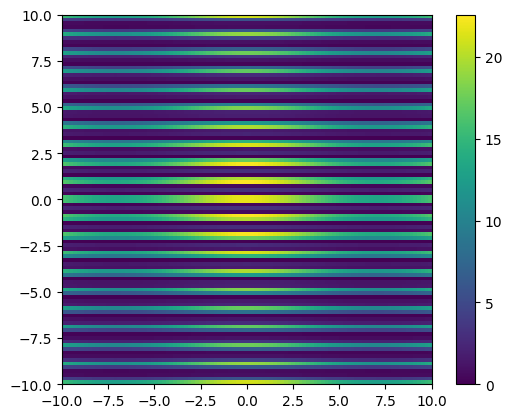

In [214]:
### trivial air propagation, vs propagation through grating
obj1 = rcwa([np.ones([100,100])], [0], [1], twist=0, N=0, M=ind, verbose=0)
obj2 = rcwa([eps,None,eps], [thickness,0,thickness], [1,1,2], gap_layer_indices=[1], twist=0, N=0, M=ind, verbose=0)
# for obj in [obj1, obj2]:
for obj in [obj2]:
    tmp = SummedRCWA(obj, freq, kincs, amps)
    # tmp = SummedRCWA(obj, freq, kincs, amps, 1,0,-30,30,-30,30)
    tmp.total_RT()
    fields = tmp.get_field(len(obj.layer_thicknesses),5,real_space=True)
    ex,ey,ez,hx,hy,hz = fields
    plt.imshow(np.abs(ex)**2+np.abs(ey)**2,extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
    plt.colorbar()
    plt.show()

In [102]:
### more things to visualize and check
# plt.imshow(ey.real,extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
# plt.imshow(np.real(ey),extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
# plt.imshow(np.real(ex),extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
# plt.imshow(np.abs(ex)**2+np.abs(ey)**2,extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
# plt.colorbar()

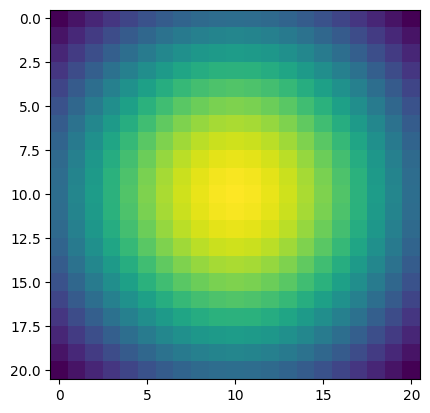

In [46]:
# freq = 1.4
freq = 2.1
# ks = np.linspace(-0.2,0.2,3)
ks = np.linspace(-0.3,0.3,21)
# ks = np.linspace(-0.05,0.05,21)
kxs, kys = np.meshgrid(ks,ks)
kincs = np.vstack([kxs.flatten(),kys.flatten()]).T
# amps = np.exp((-kxs**2-kys**2)/0.12**2)
amps = np.exp((-kxs**2-kys**2)/0.4**2)
# amps = np.exp((-kxs**2-kys**2)/0.03**2)
plt.imshow(amps)

441it [00:00, 641.17it/s]


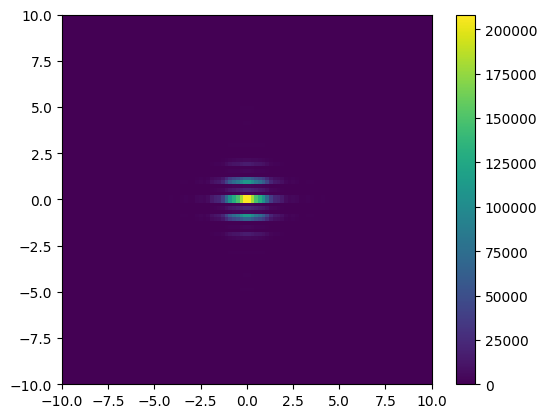

In [47]:
### trivial air propagation, vs propagation through grating
obj1 = rcwa([np.ones([100,100])], [0], [1], twist=0, N=0, M=ind, verbose=0)
obj2 = rcwa([eps,None,eps], [thickness,0,thickness], [1,1,2], gap_layer_indices=[1], twist=0, N=0, M=ind, verbose=0)
# for obj in [obj1, obj2]:
for obj in [obj2]:
    tmp = SummedRCWA(obj, freq, kincs, amps)
    # tmp = SummedRCWA(obj, freq, kincs, amps, 1,0,-30,30,-30,30)
    tmp.total_RT()
    fields = tmp.get_field(len(obj.layer_thicknesses),5,real_space=True)
    ex,ey,ez,hx,hy,hz = fields
    plt.imshow(np.abs(ex)**2+np.abs(ey)**2,extent=[tmp.x_min,tmp.x_max,tmp.y_min,tmp.y_max])
    plt.colorbar()
    plt.show()

In [16]:
len(tmp.real_space_bases)

441

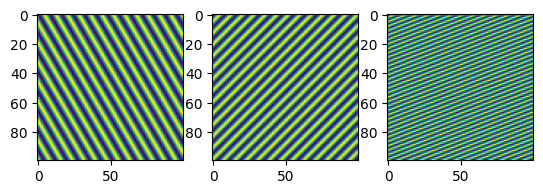

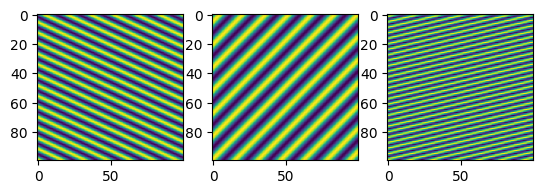

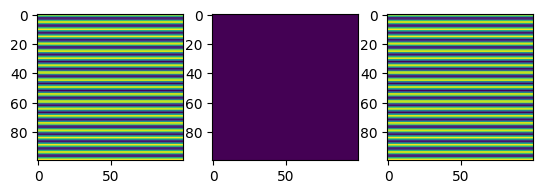

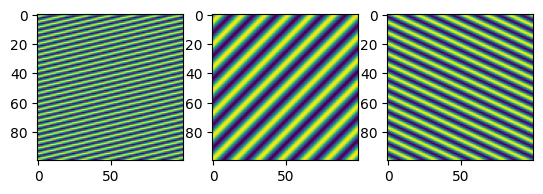

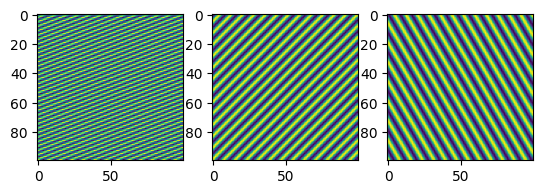

In [48]:
for i in tmp.real_space_bases[::110]:
    plt.subplot(131)
    plt.imshow(np.real(i)[0])
    plt.subplot(132)
    plt.imshow(np.real(i)[1])
    plt.subplot(133)
    plt.imshow(np.real(i)[2])
    plt.show()

In [19]:
bc = np.array(tmp.real_space_bases)

In [20]:
bc.shape

(441, 3, 100, 100)

In [21]:
np.tensordot(amps.flatten(),bc,axes=(0,0)).shape

(3, 100, 100)

In [23]:
field =np.sum(np.tensordot(amps.flatten(),bc,axes=(0,0)),axis=0)


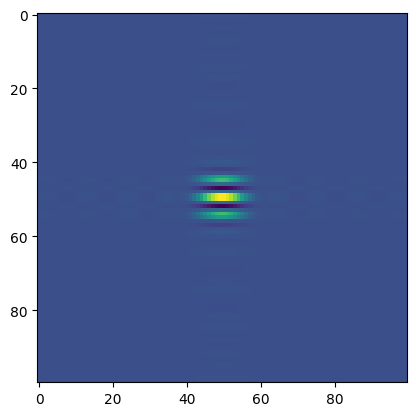

In [24]:
plt.imshow(field.real)